# Import Libraries

In [1]:
# import necessary libraries
import pandas as pd
import re
import nltk
import pickle

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
# putting drugs data on 'drug' dataframe
drug = pd.read_csv('D:/STATISTIKA/SEMESTER 7/BISMILLAH TA/BISMILLAHIRRAHMANIRRAHIM/Data/00_data_raw_clean.csv', encoding='latin1')
drug.head()

,no,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,drug_interactions,mims_class,atc_classification
0,1,Tiaryt Injection,amiodarone,Fahrenheit,Amiodarone HCl,"Serious rhythm disorders eg, atrial rhythm dis...",IV infusion Initially 5 mg/kg over 20 min to 2...,NaN,"Sinus bradycardia, sinus arrest & SA block w/o...",Exclusively administer as infusion. Avoid very...,"Local inflammatory reaction eg, superficial ph...",Drugs liable to induce Torsade de pointes: Cla...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
1,2,Tiaryt,amiodarone,Fahrenheit,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...",May be taken with or without food: Take consis...,"Severe sinus node dysfunction, 2nd- & 3rd-degr...","Monitor BP, liver function & thyroid function ...","Corneal microdeposits, photosensitization & pi...",Increased risk of ventricular arrhythmias w/ T...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
2,3,Rytmonorm,NaN,NaN,Propafenone HCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiac Drugs,C01BC03 - propafenone ; Belongs to class Ic an...
3,4,Rexidron,NaN,NaN,Amiodarone HCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
4,5,Dopamine HCl DBL,NaN,NaN,Dopamine HCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiac Drugs,C01CA04 - dopamine ; Belongs to the class of a...


In [3]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no                        739 non-null    int64 
 1   brand                     739 non-null    object
 2   generic_name              251 non-null    object
 3   manufacturer              285 non-null    object
 4   contents                  739 non-null    object
 5   indications/uses          271 non-null    object
 6   dosage/direction_for_use  271 non-null    object
 7   administration            231 non-null    object
 8   contraindications         226 non-null    object
 9   special_precaution        255 non-null    object
 10  adverse_reactions         254 non-null    object
 11  drug_interactions         195 non-null    object
 12  mims_class                739 non-null    object
 13  atc_classification        739 non-null    object
dtypes: int64(1), object(13)
me

# Data Cleaning + Preprocessing

In [4]:
# data cleaning
drug.isnull().sum()

no                            0
brand                         0
generic_name                488
manufacturer                454
contents                      0
indications/uses            468
dosage/direction_for_use    468
administration              508
contraindications           513
special_precaution          484
adverse_reactions           485
drug_interactions           544
mims_class                    0
atc_classification            0
dtype: int64

In [5]:
# removing duplicates
drug.duplicated(subset='brand').sum()

63

In [6]:
drug = drug.drop_duplicates(subset='brand')
drug.duplicated(subset='brand').sum()

0

In [7]:
drug = drug.dropna()
drug.head()

,no,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,drug_interactions,mims_class,atc_classification
1,2,Tiaryt,amiodarone,Fahrenheit,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...",May be taken with or without food: Take consis...,"Severe sinus node dysfunction, 2nd- & 3rd-degr...","Monitor BP, liver function & thyroid function ...","Corneal microdeposits, photosensitization & pi...",Increased risk of ventricular arrhythmias w/ T...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
27,28,Kendaron,amiodarone,Darya-Varia,Amiodarone HCl,Tab: Recurrent ventricular fibrillation & recu...,"Tab Initially 1 tab 3 times daily for 1 wk, th...",May be taken with or without food: Take consis...,"Sinus bradycardia, SA block, AV block. Dysthyr...","Monitor BP, liver function & thyroid function ...","Gl disturbances, headache, weakness, myalgia, ...",Avoid concomitant administration w/ wave-burst...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
32,33,Fargoxin,digoxin,Fahrenheit,Digoxin,CHF; paroxysmal supraventricular tachycardia. ...,Rapid digitalization (24-36 hr) Adult 4-6 tab ...,May be taken with or without food.,"Ventricular tachycardia & fibrillation, 2nd de...","Partial heart block, acute myocarditis, rheuma...","CNS & GI disturbances. Rarely, confusion, diso...",Amphotericin & drugs which deplete K may enhan...,Cardiac Drugs,C01AA05 - digoxin ; Belongs to the class of di...
36,37,Caduet,amlodipine + atorvastatin,Pfizer,"Per 5/10 mg FC tab Amlodipine besylate 5 mg, a...",Patients for whom treatment w/ both amlodipine...,Amlodipine/atorvastatin: 5 mg/10 mg up to a ma...,May be taken with or without food.,"Known hypersensitivity to dihydropyridines, am...",Severe obstructive CAD. Perform liver function...,Epistaxis; nausea; dizziness; fatigue. Amlodip...,Amlodipine: Increased systemic exposure in eld...,Calcium Antagonists / Anti-Anginal Drugs / Dys...,C10BX03 - atorvastatin and amlodipine ; Belong...
45,46,Farsorbid 5/Farsorbid 10/Farsorbid Injection,isosorbide dinitrate,Fahrenheit,Isosorbide dinitrate,Treatment & prophylaxis of angina pectoris.,5-mg SL tab 1-2 tab 2-3 hrly as required. 10-m...,Should be taken on an empty stomach: Take 30 m...,Glaucoma; anemia; hyperthyroidism; increased i...,May develop tolerance & cross tolerance to oth...,Orthostatic hypotension; flushing of face & ne...,Alcohol may intensify orthostatic hypotensive ...,Anti-Anginal Drugs,C01DA08 - isosorbide dinitrate ; Belongs to th...


In [8]:
# replace NaN with an empty string
drug = drug[['brand', 'generic_name', 'manufacturer', 'contents', 'indications/uses', 'dosage/direction_for_use', 'administration', 'contraindications', 'special_precaution', 'adverse_reactions', 'drug_interactions', 'mims_class', 'atc_classification']]
drug = drug.fillna(" ")
drug.head()

,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,drug_interactions,mims_class,atc_classification
1,Tiaryt,amiodarone,Fahrenheit,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...",May be taken with or without food: Take consis...,"Severe sinus node dysfunction, 2nd- & 3rd-degr...","Monitor BP, liver function & thyroid function ...","Corneal microdeposits, photosensitization & pi...",Increased risk of ventricular arrhythmias w/ T...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
27,Kendaron,amiodarone,Darya-Varia,Amiodarone HCl,Tab: Recurrent ventricular fibrillation & recu...,"Tab Initially 1 tab 3 times daily for 1 wk, th...",May be taken with or without food: Take consis...,"Sinus bradycardia, SA block, AV block. Dysthyr...","Monitor BP, liver function & thyroid function ...","Gl disturbances, headache, weakness, myalgia, ...",Avoid concomitant administration w/ wave-burst...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...
32,Fargoxin,digoxin,Fahrenheit,Digoxin,CHF; paroxysmal supraventricular tachycardia. ...,Rapid digitalization (24-36 hr) Adult 4-6 tab ...,May be taken with or without food.,"Ventricular tachycardia & fibrillation, 2nd de...","Partial heart block, acute myocarditis, rheuma...","CNS & GI disturbances. Rarely, confusion, diso...",Amphotericin & drugs which deplete K may enhan...,Cardiac Drugs,C01AA05 - digoxin ; Belongs to the class of di...
36,Caduet,amlodipine + atorvastatin,Pfizer,"Per 5/10 mg FC tab Amlodipine besylate 5 mg, a...",Patients for whom treatment w/ both amlodipine...,Amlodipine/atorvastatin: 5 mg/10 mg up to a ma...,May be taken with or without food.,"Known hypersensitivity to dihydropyridines, am...",Severe obstructive CAD. Perform liver function...,Epistaxis; nausea; dizziness; fatigue. Amlodip...,Amlodipine: Increased systemic exposure in eld...,Calcium Antagonists / Anti-Anginal Drugs / Dys...,C10BX03 - atorvastatin and amlodipine ; Belong...
45,Farsorbid 5/Farsorbid 10/Farsorbid Injection,isosorbide dinitrate,Fahrenheit,Isosorbide dinitrate,Treatment & prophylaxis of angina pectoris.,5-mg SL tab 1-2 tab 2-3 hrly as required. 10-m...,Should be taken on an empty stomach: Take 30 m...,Glaucoma; anemia; hyperthyroidism; increased i...,May develop tolerance & cross tolerance to oth...,Orthostatic hypotension; flushing of face & ne...,Alcohol may intensify orthostatic hypotensive ...,Anti-Anginal Drugs,C01DA08 - isosorbide dinitrate ; Belongs to th...


In [9]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 1 to 674
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   brand                     130 non-null    object
 1   generic_name              130 non-null    object
 2   manufacturer              130 non-null    object
 3   contents                  130 non-null    object
 4   indications/uses          130 non-null    object
 5   dosage/direction_for_use  130 non-null    object
 6   administration            130 non-null    object
 7   contraindications         130 non-null    object
 8   special_precaution        130 non-null    object
 9   adverse_reactions         130 non-null    object
 10  drug_interactions         130 non-null    object
 11  mims_class                130 non-null    object
 12  atc_classification        130 non-null    object
dtypes: object(13)
memory usage: 14.2+ KB


[Text(0.5, 1.0, 'Top 7 Manufacturer of Cardiovascular Drugs')]

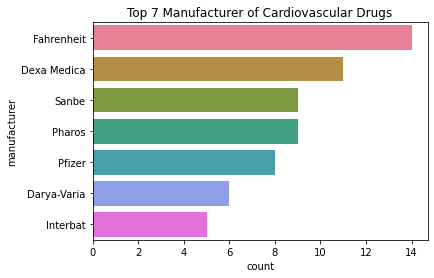

In [10]:
# Exploratory Data Analysis
sns.countplot(y="manufacturer", data=drug, palette="husl", order=drug.manufacturer.value_counts().iloc[:7].index).set(title='Top 7 Manufacturer of Cardiovascular Drugs')

[Text(0.5, 1.0, 'Top 7 Contents of Cardiovascular Drugs')]

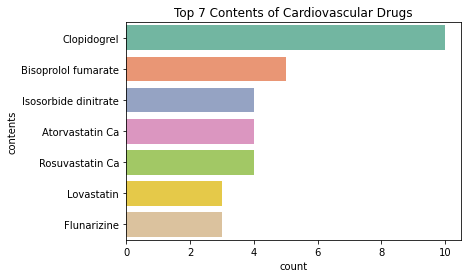

In [11]:
sns.countplot(y="contents", data=drug, palette="Set2", order=drug.contents.value_counts().iloc[:7].index).set(title='Top 7 Contents of Cardiovascular Drugs')

[Text(0.5, 1.0, 'Top 7 MIMS Class of Cardiovascular Drugs')]

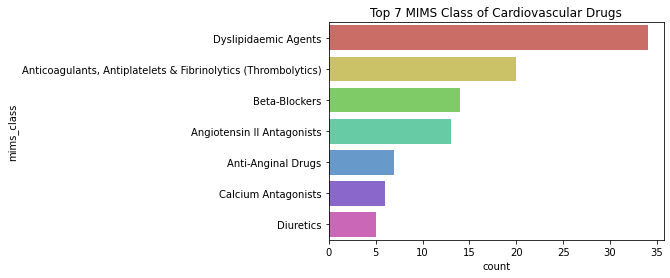

In [12]:
sns.countplot(y="mims_class", data=drug, palette="hls", order=drug.mims_class.value_counts().iloc[:7].index).set(title='Top 7 MIMS Class of Cardiovascular Drugs')

In [13]:
# make new column with overall infos
drug = drug.reset_index(drop=True)
overall_infos = []
for i in range(0, drug.shape[0]):
    overall_infos.append(drug['brand'][i]+' '+drug['generic_name'][i]+' '+drug['manufacturer'][i]+' '+drug['contents'][i]+' '+drug['indications/uses'][i]+' '+drug['dosage/direction_for_use'][i]+' '+drug['administration'][i]+' '+drug['contraindications'][i]+' '+drug['special_precaution'][i]+' '+drug['adverse_reactions'][i]+' '+drug['drug_interactions'][i]+' '+drug['mims_class'][i]+' '+drug['atc_classification'][i])
drug['overall_infos'] = overall_infos

In [14]:
file_name = '01_drug_clean.xlsx'
  
# saving the excel 
drug.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Case Folding

In [15]:
# Case Folding
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr

# Buat kolom tambahan untuk data description yang telah dicasefolding  
drug['lwr'] = drug['overall_infos'].apply(clean_lower)

In [16]:
# Replace words that have the same meaning or typo
def replace(text):
    replace = str(text)
    replace = re.sub("administerd", lambda x: 'administered', replace)
    replace = re.sub("antiarrythmic", lambda x: 'antiarrhythmic', replace)
    replace = re.sub("antihypertensice", lambda x: 'antihypertensive', replace)
    replace = re.sub("hetrozygous", lambda x: 'heterozygous', replace)
    replace = re.sub("hypercholeterolemia", lambda x: 'hypercholesterolemia', replace)
    replace = re.sub("hyperhydrosis", lambda x: 'hyperhidrosis', replace)
    replace = re.sub("hypertriglyceridaemia", lambda x: 'hypertriglyceridemia', replace)
    replace = re.sub("hypertropic", lambda x: 'hypertrophic', replace)
    replace = re.sub("initally", lambda x: 'initially', replace)
    replace = re.sub("natriuteric", lambda x: 'natriuretic', replace)
    replace = re.sub("occlussive", lambda x: 'occlusive', replace)
    replace = re.sub("phaeochoromocytoma", lambda x: 'phaeochromocytoma', replace)
    replace = re.sub("revascularisation", lambda x: 'revascularization', replace)
    replace = re.sub("rhabdomiolysis", lambda x: 'rhabdomyolysis', replace)
    replace = re.sub("thrombocytopaenia", lambda x: 'thrombocytopenia', replace)
    replace = re.sub("yr", lambda x: 'year', replace)
    return replace.strip(" ")
drug['rplc'] = drug['lwr'].apply(replace)

In [17]:
casefolding=pd.DataFrame(data=drug, columns=('overall_infos', 'rplc'))
casefolding

,overall_infos,rplc
0,Tiaryt amiodarone Fahrenheit Amiodarone HCl Su...,tiaryt amiodarone fahrenheit amiodarone hcl su...
1,Kendaron amiodarone Darya-Varia Amiodarone HCl...,kendaron amiodarone darya-varia amiodarone hcl...
2,Fargoxin digoxin Fahrenheit Digoxin CHF; parox...,fargoxin digoxin fahrenheit digoxin chf; parox...
3,Caduet amlodipine + atorvastatin Pfizer Per 5/...,caduet amlodipine + atorvastatin pfizer per 5/...
4,Farsorbid 5/Farsorbid 10/Farsorbid Injection i...,farsorbid 5/farsorbid 10/farsorbid injection i...
...,...,...
125,Simarc-2 warfarin Fahrenheit Warfarin Na Proph...,simarc-2 warfarin fahrenheit warfarin na proph...
126,Rinclo clopidogrel Yarindo Farmatama Clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...
127,Pradaxa dabigatran Boehringer Ingelheim Dabiga...,pradaxa dabigatran boehringer ingelheim dabiga...
128,Vaclo clopidogrel Dexa Medica Clopidogrel Redu...,vaclo clopidogrel dexa medica clopidogrel redu...


In [18]:
file_name = '02_casefolding.xlsx'
  
# saving the excel 
casefolding.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Remove Punctuation

In [19]:
# Remove Punctuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z #+_]')

def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
drug['clean_punct'] = drug['rplc'].apply(clean_punct)

In [20]:
drug['clean_punct']

0      tiaryt amiodarone fahrenheit amiodarone hcl su...
1      kendaron amiodarone darya varia amiodarone hcl...
2      fargoxin digoxin fahrenheit digoxin chf paroxy...
3      caduet amlodipine + atorvastatin pfizer per 51...
4      farsorbid 5farsorbid 10farsorbid injection iso...
                             ...                        
125    simarc 2 warfarin fahrenheit warfarin na proph...
126    rinclo clopidogrel yarindo farmatama clopidogr...
127    pradaxa dabigatran boehringer ingelheim dabiga...
128    vaclo clopidogrel dexa medica clopidogrel redu...
129    ticuring ticlopidine lapi ticlopidine hcl redu...
Name: clean_punct, Length: 130, dtype: object

In [21]:
remove_punct=pd.DataFrame(data=drug, columns=('lwr','clean_punct'))
remove_punct

,lwr,clean_punct
0,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...
1,kendaron amiodarone darya-varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...
2,fargoxin digoxin fahrenheit digoxin chf; parox...,fargoxin digoxin fahrenheit digoxin chf paroxy...
3,caduet amlodipine + atorvastatin pfizer per 5/...,caduet amlodipine + atorvastatin pfizer per 51...
4,farsorbid 5/farsorbid 10/farsorbid injection i...,farsorbid 5farsorbid 10farsorbid injection iso...
...,...,...
125,simarc-2 warfarin fahrenheit warfarin na proph...,simarc 2 warfarin fahrenheit warfarin na proph...
126,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...
127,pradaxa dabigatran boehringer ingelheim dabiga...,pradaxa dabigatran boehringer ingelheim dabiga...
128,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...


In [22]:
file_name = '03_remove_punctuation.xlsx'
  
# saving the excel 
remove_punct.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Remove Double Whitespace

In [23]:
# Remove Double Whitespace
def _normalize_whitespace(text):
    """
    This function normalizes whitespaces, removing duplicates.
    """
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
drug['clean_double_ws'] = drug['clean_punct'].apply(_normalize_whitespace)

In [24]:
drug['clean_double_ws']

0      tiaryt amiodarone fahrenheit amiodarone hcl su...
1      kendaron amiodarone darya varia amiodarone hcl...
2      fargoxin digoxin fahrenheit digoxin chf paroxy...
3      caduet amlodipine + atorvastatin pfizer per 51...
4      farsorbid 5farsorbid 10farsorbid injection iso...
                             ...                        
125    simarc 2 warfarin fahrenheit warfarin na proph...
126    rinclo clopidogrel yarindo farmatama clopidogr...
127    pradaxa dabigatran boehringer ingelheim dabiga...
128    vaclo clopidogrel dexa medica clopidogrel redu...
129    ticuring ticlopidine lapi ticlopidine hcl redu...
Name: clean_double_ws, Length: 130, dtype: object

In [25]:
clean_dbl_ws=pd.DataFrame(data=drug, columns=('clean_punct','clean_double_ws'))
clean_dbl_ws

,clean_punct,clean_double_ws
0,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...
1,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...
2,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...
3,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...
4,farsorbid 5farsorbid 10farsorbid injection iso...,farsorbid 5farsorbid 10farsorbid injection iso...
...,...,...
125,simarc 2 warfarin fahrenheit warfarin na proph...,simarc 2 warfarin fahrenheit warfarin na proph...
126,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...
127,pradaxa dabigatran boehringer ingelheim dabiga...,pradaxa dabigatran boehringer ingelheim dabiga...
128,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...


In [26]:
file_name = '04_remove_dbl_ws.xlsx'
  
# saving the excel 
clean_dbl_ws.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Stopword Removal

In [27]:
# Stopword Removal
stopword = set(stopwords.words('english'))


def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text

# Buat kolom tambahan untuk data description yang telah distopwordsremoval   
drug['clean_sw'] = drug['clean_double_ws'].apply(clean_stopwords)
     

In [28]:
drug['clean_sw']

0      tiaryt amiodarone fahrenheit amiodarone hcl su...
1      kendaron amiodarone darya varia amiodarone hcl...
2      fargoxin digoxin fahrenheit digoxin chf paroxy...
3      caduet amlodipine + atorvastatin pfizer per 51...
4      farsorbid 5farsorbid 10farsorbid injection iso...
                             ...                        
125    simarc 2 warfarin fahrenheit warfarin na proph...
126    rinclo clopidogrel yarindo farmatama clopidogr...
127    pradaxa dabigatran boehringer ingelheim dabiga...
128    vaclo clopidogrel dexa medica clopidogrel redu...
129    ticuring ticlopidine lapi ticlopidine hcl redu...
Name: clean_sw, Length: 130, dtype: object

In [29]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
clean_stopwordsfix=pd.DataFrame(data=drug, columns=('clean_double_ws','clean_sw'))
clean_stopwordsfix

,clean_double_ws,clean_sw
0,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...
1,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...
2,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...
3,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...
4,farsorbid 5farsorbid 10farsorbid injection iso...,farsorbid 5farsorbid 10farsorbid injection iso...
...,...,...
125,simarc 2 warfarin fahrenheit warfarin na proph...,simarc 2 warfarin fahrenheit warfarin na proph...
126,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...
127,pradaxa dabigatran boehringer ingelheim dabiga...,pradaxa dabigatran boehringer ingelheim dabiga...
128,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...


In [31]:
file_name = '05_remove_stopword.xlsx'
  
# saving the excel 
clean_stopwordsfix.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Lemmatization

In [32]:
# Lemmatization
wn= nltk.WordNetLemmatizer()

In [33]:
def lemmatization(text):
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    return text2

In [34]:
# Buat kolom tambahan untuk data description yang telah dilemmatization   
drug['desc_clean_lemma'] = drug['clean_sw'].apply(lemmatization)

In [35]:
drug['desc_clean_lemma']

0      tiaryt amiodarone fahrenheit amiodarone hcl su...
1      kendaron amiodarone darya varia amiodarone hcl...
2      fargoxin digoxin fahrenheit digoxin chf paroxy...
3      caduet amlodipine + atorvastatin pfizer per 51...
4      farsorbid 5farsorbid 10farsorbid injection iso...
                             ...                        
125    simarc 2 warfarin fahrenheit warfarin na proph...
126    rinclo clopidogrel yarindo farmatama clopidogr...
127    pradaxa dabigatran boehringer ingelheim dabiga...
128    vaclo clopidogrel dexa medica clopidogrel redu...
129    ticuring ticlopidine lapi ticlopidine hcl redu...
Name: desc_clean_lemma, Length: 130, dtype: object

In [36]:
lemmatization=pd.DataFrame(data=drug, columns = ('clean_sw', 'desc_clean_lemma'))

In [37]:
file_name = '06_lemmatization.xlsx'
  
# saving the excel 
lemmatization.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Tokenizing

In [38]:
# Tokenizing
regexp = RegexpTokenizer('\s+', gaps=True)

drug['tokenize']=drug['desc_clean_lemma'].apply(regexp.tokenize)
drug['tokenize']

0      [tiaryt, amiodarone, fahrenheit, amiodarone, h...
1      [kendaron, amiodarone, darya, varia, amiodaron...
2      [fargoxin, digoxin, fahrenheit, digoxin, chf, ...
3      [caduet, amlodipine, +, atorvastatin, pfizer, ...
4      [farsorbid, 5farsorbid, 10farsorbid, injection...
                             ...                        
125    [simarc, 2, warfarin, fahrenheit, warfarin, na...
126    [rinclo, clopidogrel, yarindo, farmatama, clop...
127    [pradaxa, dabigatran, boehringer, ingelheim, d...
128    [vaclo, clopidogrel, dexa, medica, clopidogrel...
129    [ticuring, ticlopidine, lapi, ticlopidine, hcl...
Name: tokenize, Length: 130, dtype: object

In [39]:
tokenizing=pd.DataFrame(data=drug, columns = ('desc_clean_lemma', 'tokenize'))

In [40]:
file_name = '07_tokenizing.xlsx'
  
# saving the excel 
tokenizing.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# TF-IDF

In [41]:
# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
drug['tokenize']=drug['desc_clean_lemma'].apply(regexp.tokenize).apply(lambda x: ' '.join(x))

# obtain TF-IDF values for each word in each document
tfidf = vectorizer.fit_transform(drug['tokenize']).toarray()
features = vectorizer.get_feature_names()

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
# Create dataframe
tfidf=pd.DataFrame(tfidf,columns=features)
tfidf

,10,100,1000,1010,102,1020,1040,10farsorbid,110,12,...,worsen,wort,wout,wt,xa,xanthopsia,yarindo,year,zanidip,zok
0,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.039255,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.040751,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.131546,0.0,0.0,0.04328,0.0,0.04328,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.027045,0.0,0.0,0.000000,0.047517,0.0,0.0
4,0.096740,0.0,0.0,0.00000,0.0,0.00000,0.0,0.138121,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.099910,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
126,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.086303,0.000000,0.0,0.0
127,0.015368,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0809,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.014803,0.0,0.0
128,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.046874,0.0,0.0


In [43]:
file_name = '08_TF-IDF.xlsx'
  
# saving the excel 
tfidf.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [44]:
# Term Frequency
count_vectorizer= CountVectorizer(encoding='latin-1', ngram_range=(1,1), 
                                  tokenizer=None, analyzer='word',
                                  stop_words='english')
countvec= count_vectorizer.fit_transform(drug['tokenize'])

In [45]:
# Create dataframe
tf=pd.DataFrame(countvec.toarray(),columns=count_vectorizer.get_feature_names())
tf

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1000,1010,102,1020,1040,10farsorbid,110,12,...,worsen,wort,wout,wt,xa,xanthopsia,yarindo,year,zanidip,zok
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
4,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
127,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
file_name = '09_tf.xlsx'
  
# saving the excel 
tf.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Recommmender System with Cosine Similarity

In [47]:
# building Recommender System using Cosine Similarity
# compute the Cosine Similarity
similarity_matrix = cosine_similarity(tfidf, tfidf)

# create a pandas series with drugs brand as indices and indices as series values 
indices = pd.Series(drug.index, index=drug['brand']).drop_duplicates()

In [48]:
indices

brand
Tiaryt                                            0
Kendaron                                          1
Fargoxin                                          2
Caduet                                            3
Farsorbid 5/Farsorbid 10/Farsorbid Injection      4
                                               ... 
Simarc-2                                        125
Rinclo                                          126
Pradaxa                                         127
Vaclo                                           128
Ticuring                                        129
Length: 130, dtype: int64

In [49]:
similarity_matrix

array([[1.        , 0.38176425, 0.22295188, ..., 0.11573014, 0.07100856,
        0.04141498],
       [0.38176425, 1.        , 0.28755675, ..., 0.05807983, 0.02787554,
        0.07616284],
       [0.22295188, 0.28755675, 1.        , ..., 0.1035798 , 0.04519974,
        0.04025697],
       ...,
       [0.11573014, 0.05807983, 0.1035798 , ..., 1.        , 0.1740261 ,
        0.13132951],
       [0.07100856, 0.02787554, 0.04519974, ..., 0.1740261 , 1.        ,
        0.23234166],
       [0.04141498, 0.07616284, 0.04025697, ..., 0.13132951, 0.23234166,
        1.        ]])

## Cosine Similarity

In [50]:
similarity = pd.DataFrame(similarity_matrix, columns=drug['brand'], index=drug['brand']).reset_index()
similarity

brand,brand,Tiaryt,Kendaron,Fargoxin,Caduet,Farsorbid 5/Farsorbid 10/Farsorbid Injection,Coralan,Cedocard Retard,Cedocard,Carduo,...,Plavix,Platogrix,Pladogrel,Therodel,Simclovix,Simarc-2,Rinclo,Pradaxa,Vaclo,Ticuring
0,Tiaryt,1.000000,0.381764,0.222952,0.103594,0.060154,0.171503,0.015116,0.024227,0.050586,...,0.052841,0.054604,0.061192,0.053251,0.061930,0.094726,0.051750,0.115730,0.071009,0.041415
1,Kendaron,0.381764,1.000000,0.287557,0.078420,0.184075,0.135502,0.049177,0.169560,0.061916,...,0.060821,0.060812,0.059533,0.051556,0.060056,0.059088,0.048478,0.058080,0.027876,0.076163
2,Fargoxin,0.222952,0.287557,1.000000,0.096712,0.130881,0.213183,0.051991,0.093551,0.065792,...,0.057752,0.054927,0.033089,0.029535,0.050284,0.054823,0.047422,0.103580,0.045200,0.040257
3,Caduet,0.103594,0.078420,0.096712,1.000000,0.092922,0.139163,0.039947,0.069957,0.560414,...,0.118494,0.107438,0.071719,0.103004,0.084178,0.056139,0.095888,0.081072,0.051895,0.062987
4,Farsorbid 5/Farsorbid 10/Farsorbid Injection,0.060154,0.184075,0.130881,0.092922,1.000000,0.043325,0.540738,0.526244,0.048979,...,0.048713,0.046852,0.067208,0.043986,0.057018,0.064927,0.052322,0.043483,0.037081,0.037562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Simarc-2,0.094726,0.059088,0.054823,0.056139,0.064927,0.045140,0.028765,0.039310,0.037986,...,0.109403,0.103962,0.161502,0.109175,0.115451,1.000000,0.105537,0.083050,0.131812,0.075971
126,Rinclo,0.051750,0.048478,0.047422,0.095888,0.052322,0.101411,0.037756,0.043968,0.118954,...,0.602983,0.573081,0.548824,0.678825,0.654697,0.105537,1.000000,0.164046,0.449318,0.226472
127,Pradaxa,0.115730,0.058080,0.103580,0.081072,0.043483,0.140613,0.017707,0.020715,0.049345,...,0.198420,0.194172,0.142599,0.134885,0.120324,0.083050,0.164046,1.000000,0.174026,0.131330
128,Vaclo,0.071009,0.027876,0.045200,0.051895,0.037081,0.081840,0.013207,0.017012,0.070825,...,0.352185,0.359873,0.550752,0.328994,0.428798,0.131812,0.449318,0.174026,1.000000,0.232342


In [51]:
file_name = '10_similarity.xlsx'
  
# saving the excel 
similarity.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [52]:
# Recommender System
def make_recommendation(brand, similarity_matrix=similarity_matrix):
  # Get the index corresponding to original_brand
  idx = indices[brand]

  # Get the pairwise similarity scores
  sim_scores = drug[drug['brand'] == brand].index[0]
  sim_scores = list(enumerate(similarity_matrix[idx]))

  # Sort the brand
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Scores of the 10 most similar movies
  sim_scores = sim_scores[1:8]

  # Brand indices
  brand_indices = [i[0] for i in sim_scores]

  # Top 7 most similar brand

  return drug.iloc[brand_indices]

In [53]:
check = make_recommendation('Pladogrel')
check

,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,...,mims_class,atc_classification,overall_infos,lwr,rplc,clean_punct,clean_double_ws,clean_sw,desc_clean_lemma,tokenize
111,Artepid,clopidogrel,Pharos,Clopidogrel,Reduction of atherothrombotic events in patien...,Adult 75 mg once daily. Unstable angina 300 mg...,May be taken with or without food.,"Active pathological bleeding, peptic ulcer, in...",Patients at risk of increased bleeding from tr...,"Headache, dizziness, paresthesia, GI & hematol...",...,"Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,Artepid clopidogrel Pharos Clopidogrel Reducti...,artepid clopidogrel pharos clopidogrel reducti...,artepid clopidogrel pharos clopidogrel reducti...,artepid clopidogrel pharos clopidogrel reducti...,artepid clopidogrel pharos clopidogrel reducti...,artepid clopidogrel pharos clopidogrel reducti...,artepid clopidogrel pharos clopidogrel reducti...,artepid clopidogrel pharos clopidogrel reducti...
128,Vaclo,clopidogrel,Dexa Medica,Clopidogrel,"Reduction of atherosclerotic events (MI, strok...",75 mg once daily.,May be taken with or without food.,"Active pathological bleeding eg, peptic ulcer ...",Patients at increased risk of bleeding from tr...,"Syncope, palpitation; asthenia, hernia; leg cr...",...,"Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,Vaclo clopidogrel Dexa Medica Clopidogrel Redu...,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...,vaclo clopidogrel dexa medica clopidogrel redu...
126,Rinclo,clopidogrel,Yarindo Farmatama,Clopidogrel,"Reduction of atherothrombotic events in MI, is...",Adult & elderly 75 mg daily. Non-ST segment el...,May be taken with or without food.,Hypersensitivity. Active pathological bleeding...,Patients at risk of increased bleeding from tr...,"Severe neutropaenia & thrombocytopaenia, aplas...",...,"Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,Rinclo clopidogrel Yarindo Farmatama Clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...,rinclo clopidogrel yarindo farmatama clopidogr...
124,Simclovix,clopidogrel,Simex,Clopidogrel,Reduces atherothrombotic events in patients w/...,Adult & elderly 75 mg as a single dose. Acute ...,May be taken with or without food.,"Hypersensitivity. Severe liver dysfunction, ac...",Regular hematology exam. Bleeding tendency due...,"Bleeding, hematological effects; CNS & periphe...",...,"Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,Simclovix clopidogrel Simex Clopidogrel Reduce...,simclovix clopidogrel simex clopidogrel reduce...,simclovix clopidogrel simex clopidogrel reduce...,simclovix clopidogrel simex clopidogrel reduce...,simclovix clopidogrel simex clopidogrel reduce...,simclovix clopidogrel simex clopidogrel reduce...,simclovix clopidogrel simex clopidogrel reduce...,simclovix clopidogrel simex clopidogrel reduce...
123,Therodel,clopidogrel,Sanbe,Clopidogrel,Prevention of atherothrombotic events in patie...,Adult & elderly 75 mg once daily. Unstable ang...,May be taken with or without food.,Hypersensitivity. Peptic ulcer or intracranial...,Consider blood cell count determination &/or o...,"Bleeding, hematological & GI system disorders.",...,"Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04

In [54]:
file_name = '11_recommender_system.xlsx'
  
# saving the excel 
check.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Recommender System

In [55]:
# Recommender System
def make_recommendation(brand, similarity_matrix=similarity_matrix):
  # Get the index corresponding to original_brand
  idx = indices[brand]

  # Get the pairwise similarity scores
  sim_scores = drug[drug['brand'] == brand].index[0]
  sim_scores = list(enumerate(similarity_matrix[idx]))

  # Sort the brand
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Scores of the 10 most similar movies
  sim_scores = sim_scores[1:8]

  # Brand indices
  brand_indices = [i[0] for i in sim_scores]

  df1 = pd.DataFrame(drug, columns=['brand', 'generic_name', 'manufacturer', 'contents', 'indications/uses', 'dosage/direction_for_use', 'administration', 'contraindications', 'special_precaution', 'adverse_reactions', 'drug_interactions', 'mims_class', 'atc_classification'], index=[idx])
  df2 = pd.DataFrame(drug, columns=['brand', 'generic_name', 'manufacturer', 'contents', 'indications/uses', 'dosage/direction_for_use', 'administration', 'contraindications', 'special_precaution', 'adverse_reactions', 'drug_interactions', 'mims_class', 'atc_classification'], index=brand_indices)
  
  return df1, df2

In [56]:
a, b = make_recommendation('Pladogrel')
display(a, b)

,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,drug_interactions,mims_class,atc_classification
122,Pladogrel,clopidogrel,Fahrenheit,Clopidogrel,Reduction of atherothrombotic event in patient...,Adult 75 mg once daily. Unstable angina 300 mg...,May be taken with or without food.,"Active pathological bleeding eg, peptic ulcer,...",Patient who may be at risk of increased bleedi...,"Headache, dizziness, paresthesia, GI & hematol...","Warfarin, aspirin, heparin, thrombolytics or N...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...


,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,drug_interactions,mims_class,atc_classification
111,Artepid,clopidogrel,Pharos,Clopidogrel,Reduction of atherothrombotic events in patien...,Adult 75 mg once daily. Unstable angina 300 mg...,May be taken with or without food.,"Active pathological bleeding, peptic ulcer, in...",Patients at risk of increased bleeding from tr...,"Headache, dizziness, paresthesia, GI & hematol...","Warfarin, aspirin, heparin, thrombolytics or N...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...
128,Vaclo,clopidogrel,Dexa Medica,Clopidogrel,"Reduction of atherosclerotic events (MI, strok...",75 mg once daily.,May be taken with or without food.,"Active pathological bleeding eg, peptic ulcer ...",Patients at increased risk of bleeding from tr...,"Syncope, palpitation; asthenia, hernia; leg cr...","Aspirin, NSAIDs, warfarin, phenytoin, thrombol...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...
126,Rinclo,clopidogrel,Yarindo Farmatama,Clopidogrel,"Reduction of atherothrombotic events in MI, is...",Adult & elderly 75 mg daily. Non-ST segment el...,May be taken with or without food.,Hypersensitivity. Active pathological bleeding...,Patients at risk of increased bleeding from tr...,"Severe neutropaenia & thrombocytopaenia, aplas...","Increased risk of bleeding w/ warfarin, glycop...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...
124,Simclovix,clopidogrel,Simex,Clopidogrel,Reduces atherothrombotic events in patients w/...,Adult & elderly 75 mg as a single dose. Acute ...,May be taken with or without food.,"Hypersensitivity. Severe liver dysfunction, ac...",Regular hematology exam. Bleeding tendency due...,"Bleeding, hematological effects; CNS & periphe...","Warfarin, glycoprotein IIb/IIIa inhibitors, AS...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...
123,Therodel,clopidogrel,Sanbe,Clopidogrel,Prevention of atherothrombotic events in patie...,Adult & elderly 75 mg once daily. Unstable ang...,May be taken with or without food.,Hypersensitivity. Peptic ulcer or intracranial...,Consider blood cell count determination &/or o...,"Bleeding, hematological & GI system disorders.","Warfarin, glycoprotein IIb/IIIa inhibitors, ac...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...
116,Pidovix,clopidogrel,Lapi,Clopidogrel,Reduce atherothrombotic events in patients w/ ...,Adult & elderly 75 mg as a single dose.,May be taken with or without food.,"Severe impaired liver function, active patholo...","Risk of bleeding due to trauma, surgery or pat...","Purpura, bruising, hematoma, epistaxis, hematu...","Warfarin, glycoprotein IIb/IIIa inhibitor, ace...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...
121,Platogrix,clopidogrel,PT. Aventis Pharma,Clopidogrel,Secondary prevention of atherothrombotic event...,Adult & elderly Non-ST segment elevation acute...,May be taken with or without food.,Hypersensitivity. Active pathological bleeding...,Consider blood cell count determination. Patie...,"Haematoma. Epistaxis. GI haemorrhage, diarrhoe...",Concomitant administration w/ oral anticoagula...,"Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...


In [57]:
drug

,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,...,mims_class,atc_classification,overall_infos,lwr,rplc,clean_punct,clean_double_ws,clean_sw,desc_clean_lemma,tokenize
0,Tiaryt,amiodarone,Fahrenheit,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...",May be taken with or without food: Take consis...,"Severe sinus node dysfunction, 2nd- & 3rd-degr...","Monitor BP, liver function & thyroid function ...","Corneal microdeposits, photosensitization & pi...",...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...,Tiaryt amiodarone Fahrenheit Amiodarone HCl Su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...
1,Kendaron,amiodarone,Darya-Varia,Amiodarone HCl,Tab: Recurrent ventricular fibrillation & recu...,"Tab Initially 1 tab 3 times daily for 1 wk, th...",May be taken with or without food: Take consis...,"Sinus bradycardia, SA block, AV block. Dysthyr...","Monitor BP, liver function & thyroid function ...","Gl disturbances, headache, weakness, myalgia, ...",...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...,Kendaron amiodarone Darya-Varia Amiodarone HCl...,kendaron amiodarone darya-varia amiodarone hcl...,kendaron amiodarone darya-varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...
2,Fargoxin,digoxin,Fahrenheit,Digoxin,CHF; paroxysmal supraventricular tachycardia. ...,Rapid digitalization (24-36 hr) Adult 4-6 tab ...,May be taken with or without food.,"Ventricular tachycardia & fibrillation, 2nd de...","Partial heart block, acute myocarditis, rheuma...","CNS & GI disturbances. Rarely, confusion, diso...",...,Cardiac Drugs,C01AA05 - digoxin ; Belongs to the class of di...,Fargoxin digoxin Fahrenheit Digoxin CHF; parox...,fargoxin digoxin fahrenheit digoxin chf; parox...,fargoxin digoxin fahrenheit digoxin chf; parox...,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...
3,Caduet,amlodipine + atorvastatin,Pfizer,"Per 5/10 mg FC tab Amlodipine besylate 5 mg, a...",Patients for whom treatment w/ both amlodipine...,Amlodipine/atorvastatin: 5 mg/10 mg up to a ma...,May be taken with or without food.,"Known hypersensitivity to dihydropyridines, am...",Severe obstructive CAD. Perform liver function...,Epistaxis; nausea; dizziness; fatigue. Amlodip...,...,Calcium Antagonists / Anti-Anginal Drugs / Dys...,C10BX03 - atorvastatin and amlodipine ; Belong...,Caduet amlodipine + atorvastatin Pfizer Per 5/...,caduet amlodipine + atorvastatin pfizer per 5/...,caduet amlodipine + atorvastatin pfizer per 5/...,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...
4,Farsorbid 5/Farsorbid 10/Farsorbid Injection,isosorbide dinitrate,Fahrenheit,Isosorbide dinitrate,Treatment & prophylaxis of angina pectoris.,5-mg SL tab 1-2 tab 2-3 hrly as required. 10-m...,Should be taken on an empty stomach: Take 30 m...,Glaucoma; anemia; hyperthyroidism; increased i...,May develop tolerance & cross tolerance to oth...,Orthostatic hypotension; flushing of face & ne...,...

In [58]:
# Recommender System
def make_recommendation(brand, similarity_matrix=similarity_matrix):
  # Get the index corresponding to original_brand
  idx = indices[brand]

  # Get the pairwise similarity scores
  sim_scores = drug[drug['brand'] == brand].index[0]
  sim_scores = list(enumerate(similarity_matrix[idx]))

  # Sort the brand
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  #matching the similarities to the movie titles and ids
  ranked_titles = []
  for i in range(1, 8):
    indx = sim_scores[i][0]
    ranked_titles.append([drug.iloc[indx,0], drug.iloc[indx,1], drug.iloc[indx,2], drug.iloc[indx,3], drug.iloc[indx,4],
                          drug.iloc[indx,5], drug.iloc[indx,6], drug.iloc[indx,7], drug.iloc[indx,8], drug.iloc[indx,9],
                          drug.iloc[indx,10], drug.iloc[indx,11], drug.iloc[indx,12], sim_scores[i]])

  df = pd.DataFrame(ranked_titles, columns=["Brand", "Generic Name", "Manufacturer","Contents", "Indications/Uses", 
                                            "Dosage/Direction for Use", "Administration", "Contraindications",
                                            "Special Precaution","Adverse Reactions", "Drug Interactions", "Mims Class",
                                            "ATC Classification","Data, Similarity Score"])
  return df

In [59]:
test = make_recommendation('Pladogrel')
test

,Brand,Generic Name,Manufacturer,Contents,Indications/Uses,Dosage/Direction for Use,Administration,Contraindications,Special Precaution,Adverse Reactions,Drug Interactions,Mims Class,ATC Classification,"Data, Similarity Score"
0,Artepid,clopidogrel,Pharos,Clopidogrel,Reduction of atherothrombotic events in patien...,Adult 75 mg once daily. Unstable angina 300 mg...,May be taken with or without food.,"Active pathological bleeding, peptic ulcer, in...",Patients at risk of increased bleeding from tr...,"Headache, dizziness, paresthesia, GI & hematol...","Warfarin, aspirin, heparin, thrombolytics or N...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,"(111, 0.9162557582895542)"
1,Vaclo,clopidogrel,Dexa Medica,Clopidogrel,"Reduction of atherosclerotic events (MI, strok...",75 mg once daily.,May be taken with or without food.,"Active pathological bleeding eg, peptic ulcer ...",Patients at increased risk of bleeding from tr...,"Syncope, palpitation; asthenia, hernia; leg cr...","Aspirin, NSAIDs, warfarin, phenytoin, thrombol...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,"(128, 0.5507515127957956)"
2,Rinclo,clopidogrel,Yarindo Farmatama,Clopidogrel,"Reduction of atherothrombotic events in MI, is...",Adult & elderly 75 mg daily. Non-ST segment el...,May be taken with or without food.,Hypersensitivity. Active pathological bleeding...,Patients at risk of increased bleeding from tr...,"Severe neutropaenia & thrombocytopaenia, aplas...","Increased risk of bleeding w/ warfarin, glycop...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,"(126, 0.5488235581775972)"
3,Simclovix,clopidogrel,Simex,Clopidogrel,Reduces atherothrombotic events in patients w/...,Adult & elderly 75 mg as a single dose. Acute ...,May be taken with or without food.,"Hypersensitivity. Severe liver dysfunction, ac...",Regular hematology exam. Bleeding tendency due...,"Bleeding, hematological effects; CNS & periphe...","Warfarin, glycoprotein IIb/IIIa inhibitors, AS...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,"(124, 0.5360313514396639)"
4,Therodel,clopidogrel,Sanbe,Clopidogrel,Prevention of atherothrombotic events in patie...,Adult & elderly 75 mg once daily. Unstable ang...,May be taken with or without food.,Hypersensitivity. Peptic ulcer or intracranial...,Consider blood cell count determination &/or o...,"Bleeding, hematological & GI system disorders.","Warfarin, glycoprotein IIb/IIIa inhibitors, ac...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,"(123, 0.4906263437444147)"
5,Pidovix,clopidogrel,Lapi,Clopidogrel,Reduce atherothrombotic events in patients w/ ...,Adult & elderly 75 mg as a single dose.,May be taken with or without food.,"Severe impaired liver function, active patholo...","Risk of bleeding due to trauma, surgery or pat...","Purpura, bruising, hematoma, epistaxis, hematu...","Warfarin, glycoprotein IIb/IIIa inhibitor, ace...","Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,"(116, 0.48202106172187176)"
6,Platogrix,clopidogrel,PT. Aventis Pharma,Clopidogrel,Secondary prevention of atherothrombotic event...,Adult & elderly Non-ST segment elevation acute...,May be taken with or without food.,Hypersensitivity. Active pathological bleeding...,Consider blood cell count determination. Patie...,"Haematoma. Epistaxis. GI haemorrhage, diarrhoe...",Concomitant administration w/ oral anticoagula...,"Anticoagulants, Antiplatelets & Fibrinolytics ...",B01AC04 - clopidogrel ; Belongs to the class o...,"(121, 0.4584335411744637)"


In [60]:
drug

,brand,generic_name,manufacturer,contents,indications/uses,dosage/direction_for_use,administration,contraindications,special_precaution,adverse_reactions,...,mims_class,atc_classification,overall_infos,lwr,rplc,clean_punct,clean_double_ws,clean_sw,desc_clean_lemma,tokenize
0,Tiaryt,amiodarone,Fahrenheit,Amiodarone HCl,Suppression & prevention of life-threatening v...,"Ventricular arrhythmia Initially 800-1,600 mg ...",May be taken with or without food: Take consis...,"Severe sinus node dysfunction, 2nd- & 3rd-degr...","Monitor BP, liver function & thyroid function ...","Corneal microdeposits, photosensitization & pi...",...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...,Tiaryt amiodarone Fahrenheit Amiodarone HCl Su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...,tiaryt amiodarone fahrenheit amiodarone hcl su...
1,Kendaron,amiodarone,Darya-Varia,Amiodarone HCl,Tab: Recurrent ventricular fibrillation & recu...,"Tab Initially 1 tab 3 times daily for 1 wk, th...",May be taken with or without food: Take consis...,"Sinus bradycardia, SA block, AV block. Dysthyr...","Monitor BP, liver function & thyroid function ...","Gl disturbances, headache, weakness, myalgia, ...",...,Cardiac Drugs,C01BD01 - amiodarone ; Belongs to class III an...,Kendaron amiodarone Darya-Varia Amiodarone HCl...,kendaron amiodarone darya-varia amiodarone hcl...,kendaron amiodarone darya-varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...,kendaron amiodarone darya varia amiodarone hcl...
2,Fargoxin,digoxin,Fahrenheit,Digoxin,CHF; paroxysmal supraventricular tachycardia. ...,Rapid digitalization (24-36 hr) Adult 4-6 tab ...,May be taken with or without food.,"Ventricular tachycardia & fibrillation, 2nd de...","Partial heart block, acute myocarditis, rheuma...","CNS & GI disturbances. Rarely, confusion, diso...",...,Cardiac Drugs,C01AA05 - digoxin ; Belongs to the class of di...,Fargoxin digoxin Fahrenheit Digoxin CHF; parox...,fargoxin digoxin fahrenheit digoxin chf; parox...,fargoxin digoxin fahrenheit digoxin chf; parox...,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...,fargoxin digoxin fahrenheit digoxin chf paroxy...
3,Caduet,amlodipine + atorvastatin,Pfizer,"Per 5/10 mg FC tab Amlodipine besylate 5 mg, a...",Patients for whom treatment w/ both amlodipine...,Amlodipine/atorvastatin: 5 mg/10 mg up to a ma...,May be taken with or without food.,"Known hypersensitivity to dihydropyridines, am...",Severe obstructive CAD. Perform liver function...,Epistaxis; nausea; dizziness; fatigue. Amlodip...,...,Calcium Antagonists / Anti-Anginal Drugs / Dys...,C10BX03 - atorvastatin and amlodipine ; Belong...,Caduet amlodipine + atorvastatin Pfizer Per 5/...,caduet amlodipine + atorvastatin pfizer per 5/...,caduet amlodipine + atorvastatin pfizer per 5/...,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...,caduet amlodipine + atorvastatin pfizer per 51...
4,Farsorbid 5/Farsorbid 10/Farsorbid Injection,isosorbide dinitrate,Fahrenheit,Isosorbide dinitrate,Treatment & prophylaxis of angina pectoris.,5-mg SL tab 1-2 tab 2-3 hrly as required. 10-m...,Should be taken on an empty stomach: Take 30 m...,Glaucoma; anemia; hyperthyroidism; increased i...,May develop tolerance & cross tolerance to oth...,Orthostatic hypotension; flushing of face & ne...,...

In [61]:
file_name = '11_drug_130.xlsx'
  
# saving the excel 
drug.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [62]:
pickle.dump(drug,open('drug.pkl','wb'))

In [63]:
pickle.dump(similarity_matrix,open('similarity_matrix.pkl','wb'))